### Análise Exploratório ###
Shape de X_train: (30758, 228)
Shape de y_train: (30758,)
Shape de X_test: (15244, 228)
Shape de y_test: (15244,)

### Verificando valores nulos ###
Valores nulos em X_train: 0
Valores nulos em X_test: 0

### Estatísticas das Features ###
Média por feature (X_train): [6.97070600e-01 7.29568280e-01 5.83851746e-01 2.28369543e+01
 1.51804734e+01 1.29034072e+01 6.44173391e-03 2.93841320e-02
 8.05919490e-02 1.59254293e-01 2.26555094e-01 2.25213051e-01
 1.55736532e-01 7.93340117e-02 2.99246220e-02 7.56458015e-03
 1.28574891e+01 2.91049355e+01 4.72463496e+00 7.81974237e-01
 7.34353078e-01 5.85514017e-01 2.35439407e+01 1.53293127e+01
 1.33834450e+01 6.47500592e-03 2.87600336e-02 7.89490434e-02
 1.58409340e-01 2.31417782e-01 2.28679312e-01 1.51885092e-01
 7.72146246e-02 3.01835301e-02 8.02623659e-03 1.38316822e+01
 3.38169333e+01 5.52031833e+00 8.21695960e-01 7.52203441e-01
 6.00157498e-01 2.46632671e+01 1.52620782e+01 1.34691137e+01
 6.48044650e-03 2.90487311e-02 8

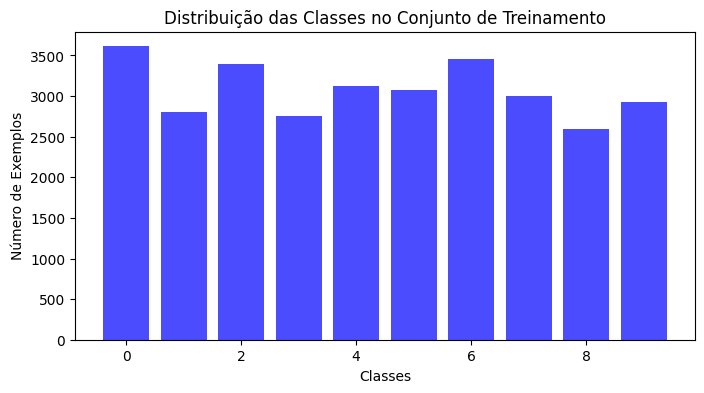


### Estatísticas de Dados Normalizados ###
Média por feature (X_train escalado): [-8.42193573e-15 -1.15673775e-14  4.74085950e-15 -9.04479113e-17
 -4.63996558e-15 -7.05268473e-16 -5.72854290e-14  3.52432087e-13
  4.53777871e-14 -3.05679577e-14 -1.61072703e-14  2.39259234e-15
 -3.57084080e-15  2.53403370e-14  3.65226976e-13 -7.85786244e-14
  3.54055313e-15 -7.19338468e-16 -6.07291417e-15 -2.20323575e-15
 -2.59599005e-15  1.17490819e-14  6.48403743e-16 -7.30394497e-16
  2.09985846e-15 -5.28389204e-14  3.66352482e-13  3.15330266e-14
 -8.49296430e-16 -6.22988956e-15 -1.12279082e-14  1.77864348e-14
  2.93168470e-15  3.57618379e-13 -8.54020094e-14  3.06799907e-15
 -7.20074815e-16  1.99300879e-15  9.15307740e-16  1.26564631e-15
  6.94450674e-16  1.11065978e-15 -6.94447967e-16 -2.67165508e-15
 -6.44903281e-14  3.74151231e-13  4.62323174e-14 -5.54404042e-16
 -1.11246166e-14 -2.03109379e-14 -2.09964189e-14  3.93022795e-14
  3.71076381e-13 -7.50259468e-14 -1.74032278e-16 -4.46049191e-17
  1.0772

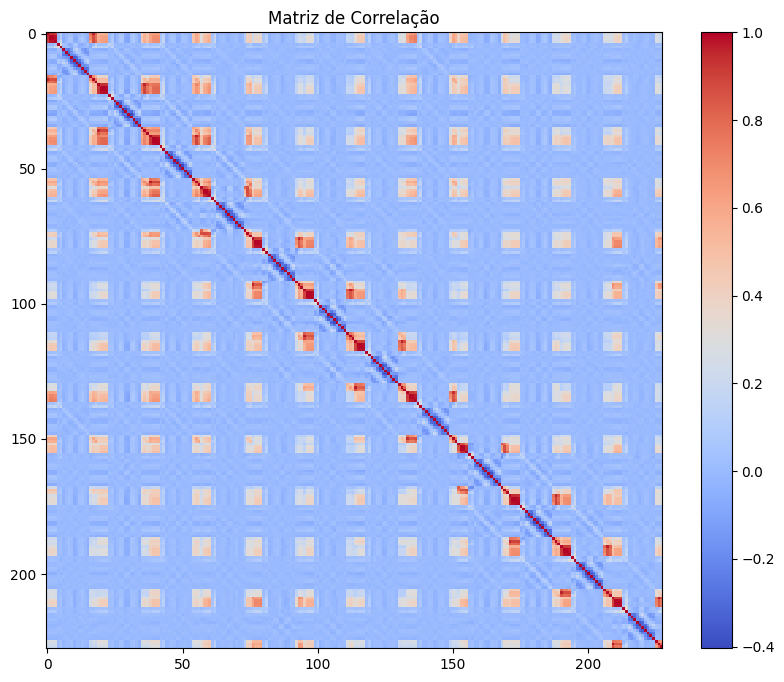

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


output2 = r"C:\Users\molinaa\Desktop\tcc\TCC_Molina\code\data_processing\DB5\ex1\feature_set_2"
# Carregar os dados
X_train = np.load(f"{output2}/db5_ex1_all_X_train_features_2.npy")
y_train = np.load(f"{output2}/db5_ex1_all_y_train_2.npy")
X_test = np.load(f"{output2}/db5_ex1_all_X_test_features_2.npy")
y_test = np.load(f"{output2}/db5_ex1_all_y_test_2.npy")

# Função para análise exploratória
def analyze_data(X_train, y_train, X_test, y_test):
    print("### Análise Exploratório ###")
    # Tamanho dos datasets
    print(f"Shape de X_train: {X_train.shape}")
    print(f"Shape de y_train: {y_train.shape}")
    print(f"Shape de X_test: {X_test.shape}")
    print(f"Shape de y_test: {y_test.shape}")
    
    # Checar valores nulos ou inválidos
    print("\n### Verificando valores nulos ###")
    print(f"Valores nulos em X_train: {np.isnan(X_train).sum()}")
    print(f"Valores nulos em X_test: {np.isnan(X_test).sum()}")
    
    # Estatísticas básicas das features
    print("\n### Estatísticas das Features ###")
    print(f"Média por feature (X_train): {X_train.mean(axis=0)}")
    print(f"Desvio padrão por feature (X_train): {X_train.std(axis=0)}")
    
    # Análise da distribuição das classes
    print("\n### Distribuição das Classes ###")
    classes, class_counts = np.unique(y_train, return_counts=True)
    for c, count in zip(classes, class_counts):
        print(f"Classe {c}: {count} exemplos ({(count / len(y_train)) * 100:.2f}%)")
    
    # Visualizar distribuição de classes
    plt.figure(figsize=(8, 4))
    plt.bar(classes, class_counts, color='blue', alpha=0.7)
    plt.title("Distribuição das Classes no Conjunto de Treinamento")
    plt.xlabel("Classes")
    plt.ylabel("Número de Exemplos")
    plt.show()

    # Escalar os dados para verificar padrão normalizado (opcional para DL)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\n### Estatísticas de Dados Normalizados ###")
    print(f"Média por feature (X_train escalado): {X_train_scaled.mean(axis=0)}")
    print(f"Desvio padrão por feature (X_train escalado): {X_train_scaled.std(axis=0)}")

    # Visualização da correlação entre features
    print("\n### Correlação entre Features ###")
    correlation_matrix = np.corrcoef(X_train_scaled, rowvar=False)
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.title("Matriz de Correlação")
    plt.colorbar()
    plt.show()

# Chamar a função
analyze_data(X_train, y_train, X_test, y_test)


In [78]:
import os
from scipy.io import loadmat
import nina_funcs as nf

# Diretório contendo os arquivos .mat
data_dir = "C:/Users/molinaa/Desktop/tcc/TCC_Molina/code/data_processing/db5_files/"

# Lista dos arquivos .mat
files = [f for f in os.listdir(data_dir) if f.endswith(".mat")]

# Parâmetros
train_reps = [1, 3, 4, 5, 6]
test_reps = [2]
win_len = 60
win_stride = 10
gestures = [1, 2, 3, 4, 5]

# Listas para armazenar os dados
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

# Loop para processar cada arquivo
for file in files:
    # Carregar os dados
    dados = nf.get_data(data_dir, file)
    data_normalized = nf.normalise(dados, train_reps)
    
    # Janelamento
    X_train, y_train, _ = nf.windowing(data_normalized, train_reps, gestures, win_len, win_stride)
    X_test, y_test, _ = nf.windowing(data_normalized, test_reps, gestures, win_len, win_stride)
    
    # Categorização
    y_train = nf.get_categorical(y_train)
    y_test = nf.get_categorical(y_test)
    
    # Adicionar os dados à lista
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

# Concatenar os dados de todos os indivíduos
import numpy as np
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

print("Dados de Treinamento:", X_train.shape, y_train.shape)
print("Dados de Teste:", X_test.shape, y_test.shape)


Dados de Treinamento: (19481, 60, 12) (19481, 5)
Dados de Teste: (3770, 60, 12) (3770, 5)


In [79]:
def rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

def zc(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)

def mav(signal):
    return np.mean(np.abs(signal))

def var(signal):
    """Variance"""
    return np.var(signal)

def fft(signal):
    """Fast Fourier Transform (FFT)"""
    fft_values = np.abs(np.fft.fft(signal))  # Magnitude dos coeficientes
    return np.mean(fft_values[:len(fft_values) // 2])  # Média dos valores positivos

def wl(signal):
    return np.sum(np.abs(np.diff(signal)))

def ssc(signal, threshold=0):
    ssc_count = 0
    for i in range(1, len(signal) - 1):
        diff1 = signal[i] - signal[i - 1]
        diff2 = signal[i + 1] - signal[i]
        # Verifica se há uma mudança de sinal na inclinação
        if (diff1 * diff2 < 0) and (abs(diff1) > threshold or abs(diff2) > threshold):
            ssc_count += 1
    return ssc_count

def hist(data, nbins=20):
    histsig, bin_edges = np.histogram(data, bins=nbins)
    return tuple(histsig)

features = [rms,mav,ssc,wl,zc,var]
feature_matrix = nf.feature_extractor(features,(X_train.shape[0],-1),X_train)
test_feature_matrix = nf.feature_extractor(features,(X_test.shape[0],-1),X_test)

print("Feature Matrix Shape (Train):", feature_matrix.shape)
print("Feature Matrix Shape (Test):", test_feature_matrix.shape)

  0%|          | 0/6 [00:00<?, ?it/s]

Extracting feature....<function rms at 0x00000249FF030D60>


 17%|█▋        | 1/6 [00:02<00:10,  2.12s/it]

Done extracting feature....<function rms at 0x00000249FF030D60>

Extracting feature....<function mav at 0x00000249FF0311C0>


 33%|███▎      | 2/6 [00:03<00:07,  1.93s/it]

Done extracting feature....<function mav at 0x00000249FF0311C0>

Extracting feature....<function ssc at 0x00000249FF030040>


 50%|█████     | 3/6 [00:14<00:17,  5.67s/it]

Done extracting feature....<function ssc at 0x00000249FF030040>

Extracting feature....<function wl at 0x00000249FF0307C0>


 67%|██████▋   | 4/6 [00:16<00:08,  4.31s/it]

Done extracting feature....<function wl at 0x00000249FF0307C0>

Extracting feature....<function zc at 0x00000249FF031080>


 83%|████████▎ | 5/6 [00:19<00:03,  3.81s/it]

Done extracting feature....<function zc at 0x00000249FF031080>

Extracting feature....<function var at 0x00000249FF031800>


100%|██████████| 6/6 [00:24<00:00,  4.08s/it]


Done extracting feature....<function var at 0x00000249FF031800>



  0%|          | 0/6 [00:00<?, ?it/s]

Extracting feature....<function rms at 0x00000249FF030D60>


 17%|█▋        | 1/6 [00:00<00:02,  2.47it/s]

Done extracting feature....<function rms at 0x00000249FF030D60>

Extracting feature....<function mav at 0x00000249FF0311C0>


 33%|███▎      | 2/6 [00:00<00:01,  2.61it/s]

Done extracting feature....<function mav at 0x00000249FF0311C0>

Extracting feature....<function ssc at 0x00000249FF030040>


 50%|█████     | 3/6 [00:02<00:03,  1.12s/it]

Done extracting feature....<function ssc at 0x00000249FF030040>

Extracting feature....<function wl at 0x00000249FF0307C0>


 67%|██████▋   | 4/6 [00:03<00:01,  1.15it/s]

Done extracting feature....<function wl at 0x00000249FF0307C0>

Extracting feature....<function zc at 0x00000249FF031080>


 83%|████████▎ | 5/6 [00:03<00:00,  1.32it/s]

Done extracting feature....<function zc at 0x00000249FF031080>

Extracting feature....<function var at 0x00000249FF031800>


100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

Done extracting feature....<function var at 0x00000249FF031800>

Feature Matrix Shape (Train): (19481, 72)
Feature Matrix Shape (Test): (3770, 72)


Treinando e avaliando o modelo: Random Forest
Acurácia no Teste com Random Forest: 0.7485



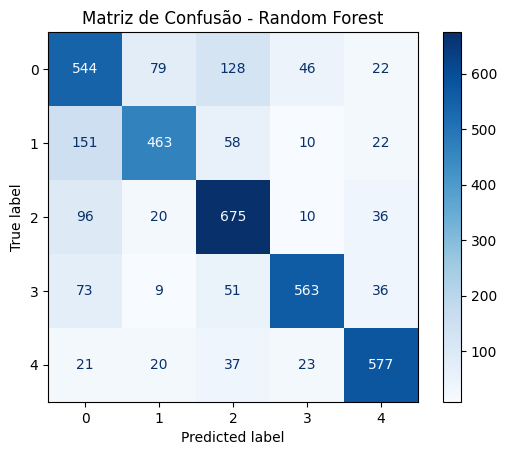

Treinando e avaliando o modelo: LDA
Acurácia no Teste com LDA: 0.5984



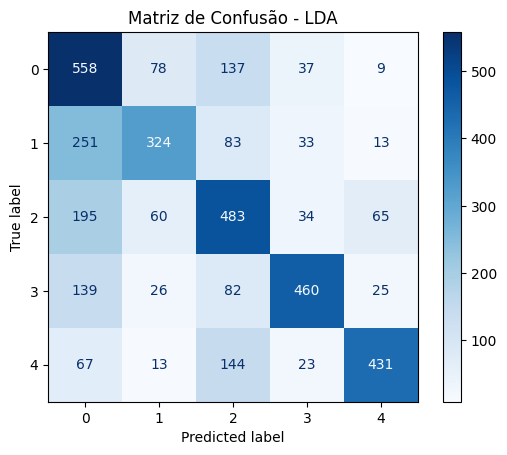

Treinando e avaliando o modelo: SVM
Acurácia no Teste com SVM: 0.6215



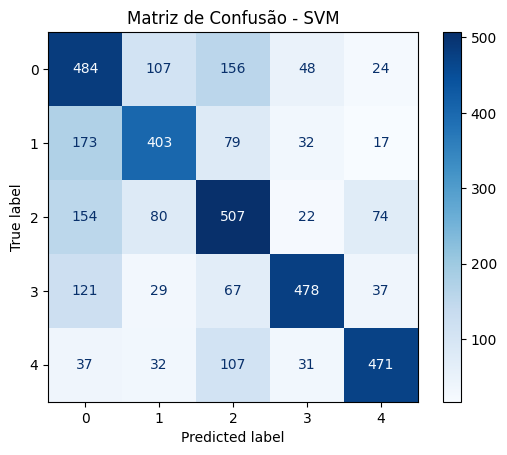

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Corrigir as labels para 1D
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Lista de modelos para avaliação
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": LinearSVC(random_state=42)
}

# Loop para treinar, avaliar e plotar matrizes de confusão
for name, model in models.items():
    print(f"Treinando e avaliando o modelo: {name}")
    
    # Treinar o modelo
    model.fit(feature_matrix, y_train)
    
    # Fazer previsões
    y_pred = model.predict(test_feature_matrix)
    
    # Avaliar
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia no Teste com {name}: {accuracy:.4f}\n")
    
    # Calcular matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotar matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()
